In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("seaborn")

from warnings import filterwarnings

filterwarnings("ignore")

/tmp/ipykernel_4835/1613416109.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
from zipfile import ZipFile
import py7zr

# Download the data and unzipped

#! wget -nv https://www.insee.fr/fr/statistiques/fichier/6215138/Filosofi2017_carreaux_200m_csv.zip

#print("File downloaded")

def dezipper():

    fichier=! find *.zip
    with ZipFile(fichier[0],'r') as zip:

        zip.extractall()
    
    l=[f for f in os.listdir() if '.7z' in f]

    for file in l:
        
        with py7zr.SevenZipFile(file, mode='r') as z: 

            z.extractall()
    ! rm *.zip
    ! rm *.7z
    return

#dezipper()

#! rm F*.csv

In [4]:
chatelet_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-chatelet.csv",sep=";")
auber_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-auber.csv",sep=";")
roosevelt_air=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv",sep=";")

In [5]:
chatelet_air.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,ND,ND,43,508,"18,2","49,1"
1,2022-10-10T01:00:00+02:00,ND,ND,45,529,"18,5","48,4"
2,2022-10-10T00:00:00+02:00,ND,ND,42,547,"18,8","47,1"
3,2022-10-09T23:00:00+02:00,ND,ND,59,614,"19,1","47,2"
4,2022-10-09T22:00:00+02:00,ND,ND,65,637,"19,4","46,3"


In [6]:
auber_air.head()

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,28,56,103,35,509,"21,7","43,7"
1,2022-10-10T01:00:00+02:00,29,58,108,41,518,"21,8","43,1"
2,2022-10-10T00:00:00+02:00,28,58,140,52,533,22,"42,9"
3,2022-10-09T23:00:00+02:00,27,57,113,41,570,"22,1","43,1"
4,2022-10-09T22:00:00+02:00,15,53,138,49,588,"22,4","42,2"


In [7]:
roosevelt_air.head()

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,33,58,58,522,"21,3",44
1,2022-10-10T01:00:00+02:00,53,63,48,540,"21,5","43,3"
2,2022-10-10T00:00:00+02:00,31,62,39,551,"21,6","42,6"
3,2022-10-09T23:00:00+02:00,21,63,31,542,21,"44,7"
4,2022-10-09T22:00:00+02:00,10,48,30,532,"20,8","45,2"


In [8]:
chatelet_air["DATE/HEURE"]=pd.to_datetime(chatelet_air["DATE/HEURE"],errors="coerce",utc=True)
auber_air["DATE/HEURE"]=pd.to_datetime(auber_air["DATE/HEURE"],errors="coerce",utc=True)
roosevelt_air["DATE/HEURE"]=pd.to_datetime(roosevelt_air["date/heure"],errors="coerce",utc=True)
roosevelt_air=roosevelt_air.drop(columns=["date/heure"])

In [9]:
chatelet_air=chatelet_air.dropna()
auber_air=auber_air.dropna()
roosevelt_air=roosevelt_air.dropna()

In [10]:
roosevelt_air.shape,chatelet_air.shape,auber_air.shape

((75991, 7), (60733, 7), (75808, 8))

In [11]:
# Feature engineering for date

chatelet_air["Heure"]=chatelet_air["DATE/HEURE"].dt.hour
chatelet_air["Day"]=chatelet_air["DATE/HEURE"].dt.day
chatelet_air["Month"]=chatelet_air["DATE/HEURE"].dt.month
chatelet_air["Year"]=chatelet_air["DATE/HEURE"].dt.year

auber_air["Heure"]=auber_air["DATE/HEURE"].dt.hour
auber_air["Day"]=auber_air["DATE/HEURE"].dt.day
auber_air["Month"]=auber_air["DATE/HEURE"].dt.month
auber_air["Year"]=auber_air["DATE/HEURE"].dt.year

roosevelt_air["Heure"]=roosevelt_air["DATE/HEURE"].dt.hour
roosevelt_air["Day"]=roosevelt_air["DATE/HEURE"].dt.day
roosevelt_air["Month"]=roosevelt_air["DATE/HEURE"].dt.month
roosevelt_air["Year"]=roosevelt_air["DATE/HEURE"].dt.year

In [12]:
# Deleting datetime columns not useful for prediction

roosevelt_air=roosevelt_air.drop(columns=["DATE/HEURE"])
chatelet_air=chatelet_air.drop(columns=["DATE/HEURE"])
auber_air=auber_air.drop(columns=["DATE/HEURE"])

In [13]:
roosevelt_air.head(2)

,NO,NO2,PM10,CO2,TEMP,HUMI,Heure,Day,Month,Year
0,33,58,58,522,"21,3",44,0,10,10,2022
1,53,63,48,540,"21,5","43,3",23,9,10,2022


In [14]:
# Formating of numbers by replacing , by . for converting object to float

roosevelt_air=roosevelt_air.apply(lambda x: x.replace(",","."))
chatelet_air=chatelet_air.replace(",",".")
auber_air=auber_air.replace(",",".")

In [15]:
roosevelt_air.head(2)

,NO,NO2,PM10,CO2,TEMP,HUMI,Heure,Day,Month,Year
0,33,58,58,522,"21,3",44,0,10,10,2022
1,53,63,48,540,"21,5","43,3",23,9,10,2022


In [16]:
def convert_object_to_float(df):

    """
    df: a dataframe

    convert object columns to float after formating

    return the dataframe to the right format
    
    """

    object_columns=df.select_dtypes(include="object").columns

    df[object_columns]=df[object_columns].astype(str)

    for col in object_columns:

        df[col]=pd.to_numeric(df[col].apply(lambda x: x.replace(",",".").strip()),errors='coerce')

    return df

In [17]:
# Converting object columns to the right type float

roosevelt_air=convert_object_to_float(roosevelt_air)

chatelet_air=convert_object_to_float(chatelet_air)

auber_air=convert_object_to_float(auber_air)

In [18]:
auber_air.isna().sum()

NO       31446
NO2      28748
PM10     26469
PM2.5    28174
CO2      28902
TEMP     27462
HUMI     27451
Heure        0
Day          0
Month        0
Year         0
dtype: int64

In [19]:
chatelet_air=chatelet_air.dropna()
auber_air=auber_air.dropna()
roosevelt_air=roosevelt_air.dropna()

In [20]:
roosevelt_air.shape,chatelet_air.shape,auber_air.shape

((67346, 10), (49771, 10), (37605, 11))

### Correlation analysis

In [21]:
# correlation computing

cor_auber=auber_air.corr()
cor_chatelet=chatelet_air.corr()
cor_roosevelt=roosevelt_air.corr()

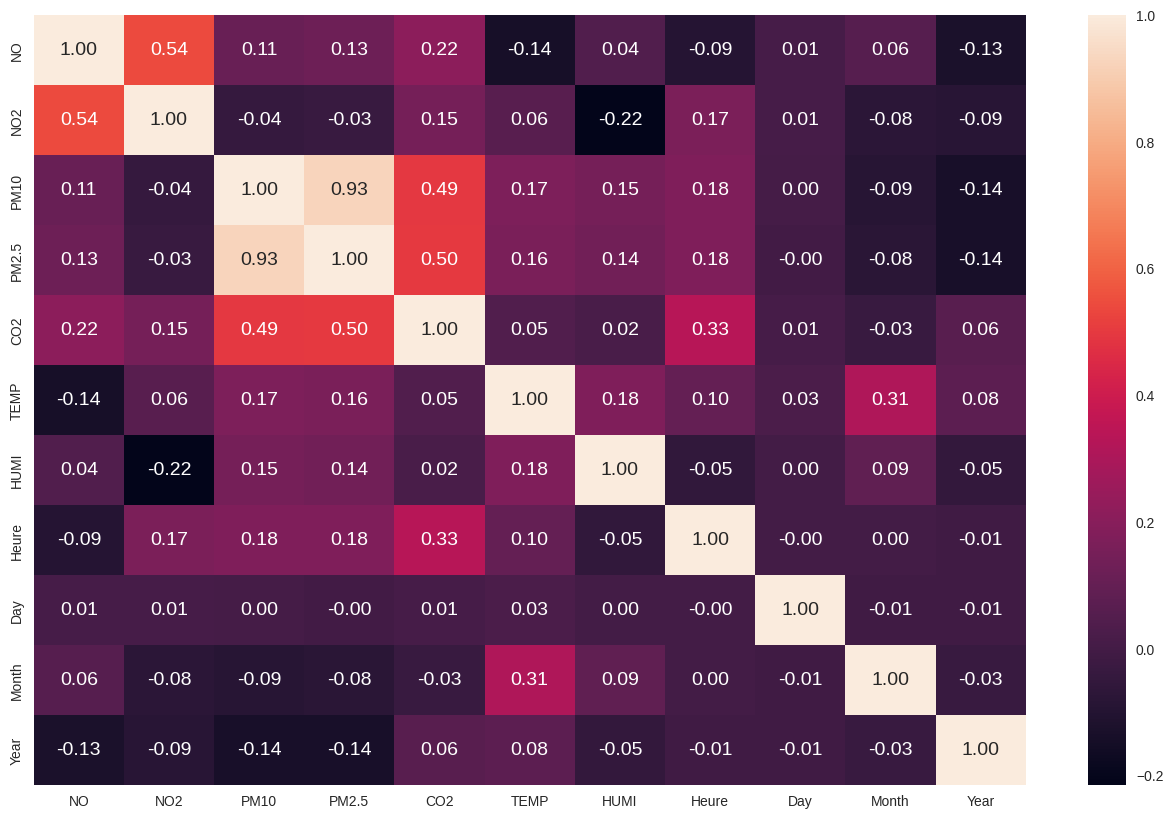

In [22]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_auber,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

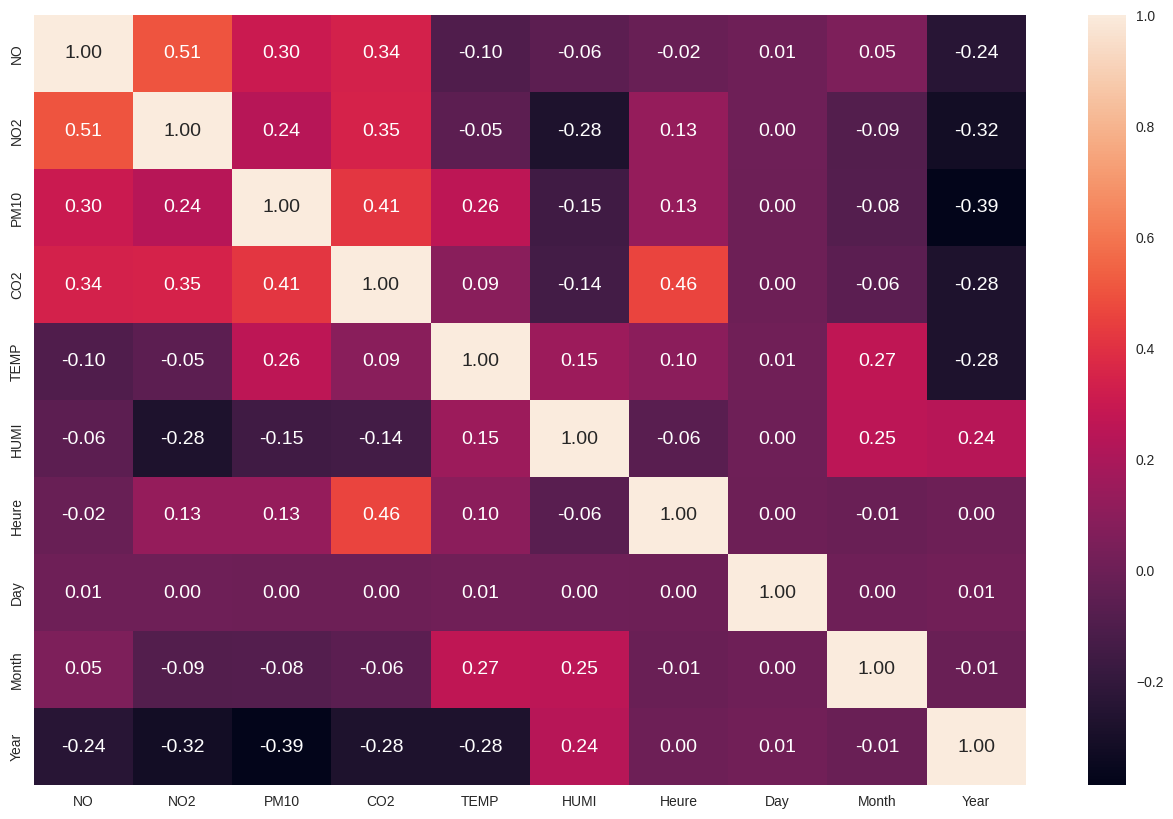

In [23]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_chatelet,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

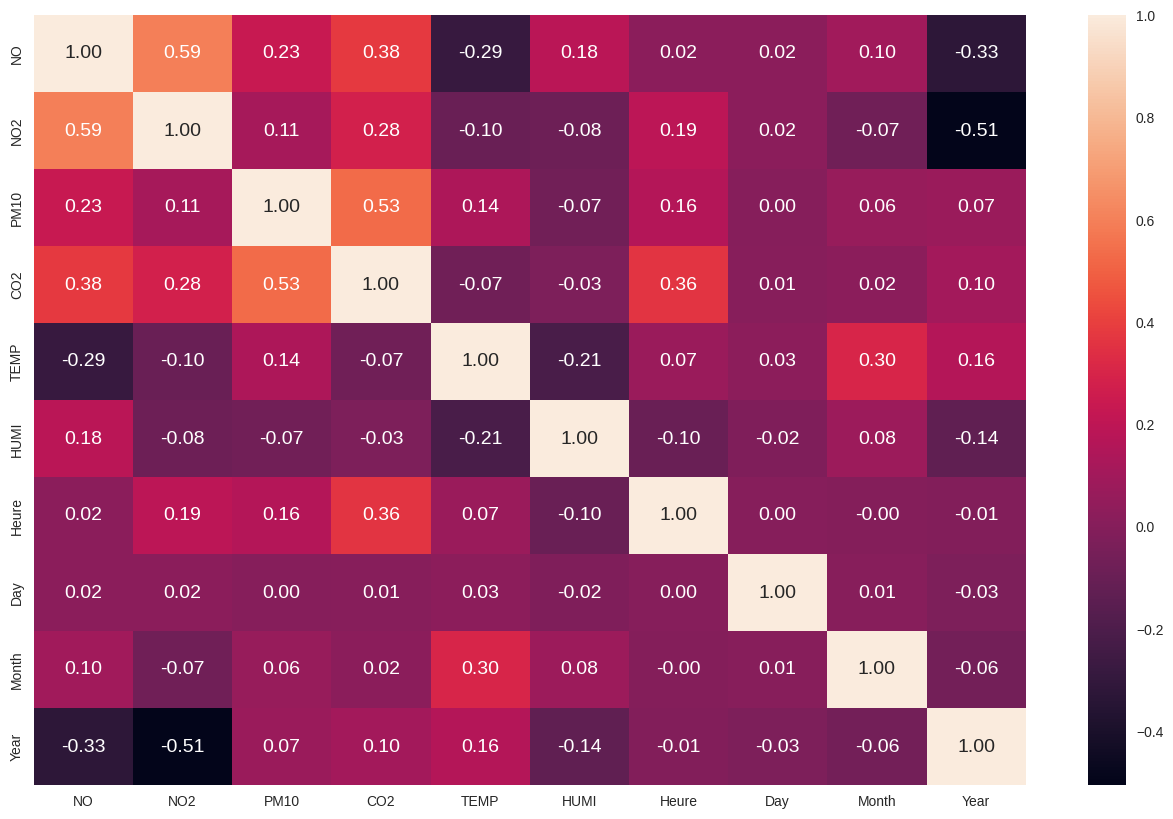

In [24]:
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(16,10))
sns.heatmap(cor_roosevelt,annot=True,fmt='.2f')
#plt.tight_layout()
plt.show()

### Checking for skewness and to resolve it

In [25]:
import numpy as np

def get_best_lmbda(df,col,number_of_lmbda):

    lmbda_values=[]

    skeweness_values=[]

    for lmbda in np.linspace(-1,1,number_of_lmbda):
        
        col_trans=stats.boxcox(df[col],lmbda=lmbda)

        skeweness_values.append(np.abs(stats.skew(col_trans)))

        lmbda_values.append(lmbda)

    plt.plot(lmbda_values,skeweness_values)
    
    plt.ylabel("skewness")
    
    plt.xlabel("lmbda_values")
    
    plt.show()
    
    lmbda_optimal=lmbda_values[skeweness_values.index(min(skeweness_values))]

    print(f"Optimal value of lmbda est:{lmbda_optimal}")

    return lmbda_optimal


def solve_skewness(df,col,lmbda=0.0):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

    df[col+'_trans']=stats.boxcox(df[col],lmbda=lmbda)

    ax[0].hist(df[col])
    ax[1].hist(df[col+'_trans'])

    ax[0].set_title("Orginal data")
    ax[1].set_title("Transformed data")
    ax[0].set_xlabel(col)
    ax[1].set_xlabel(col+'_trans')

    plt.show()

    return df

In [26]:
transformed_cols=['NO_trans', 'NO2_trans', 'PM10_trans','TEMP_trans','HUMI_trans','Year',\
    'Day','Month',"Heure"]


original_cols=['NO', 'NO2', 'PM10', 'TEMP', 'HUMI', 'Heure', 'Day', 'Month','Year']

We will add one to all hours to avoid infinity when performing log transformed to solve skewness

In [27]:
def transform_data(df,to_transform_cols):

    for col in to_transform_cols:

        lmbda_optimal=get_best_lmbda(df,col,1000)
        df=solve_skewness(df,col,lmbda=lmbda_optimal)

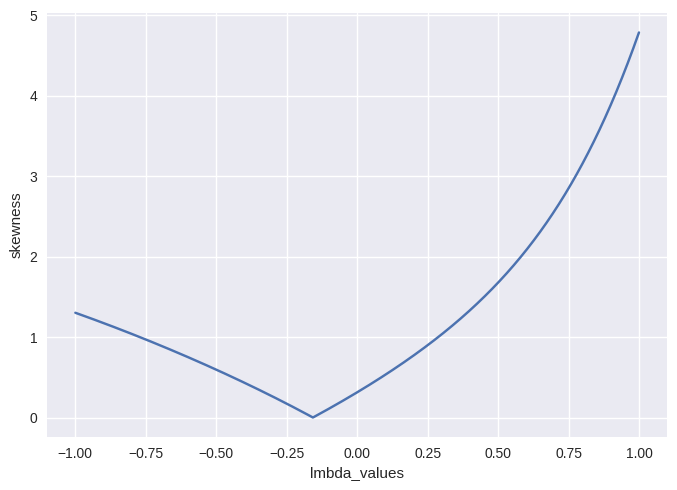

Optimal value of lmbda est:-0.15715715715715717


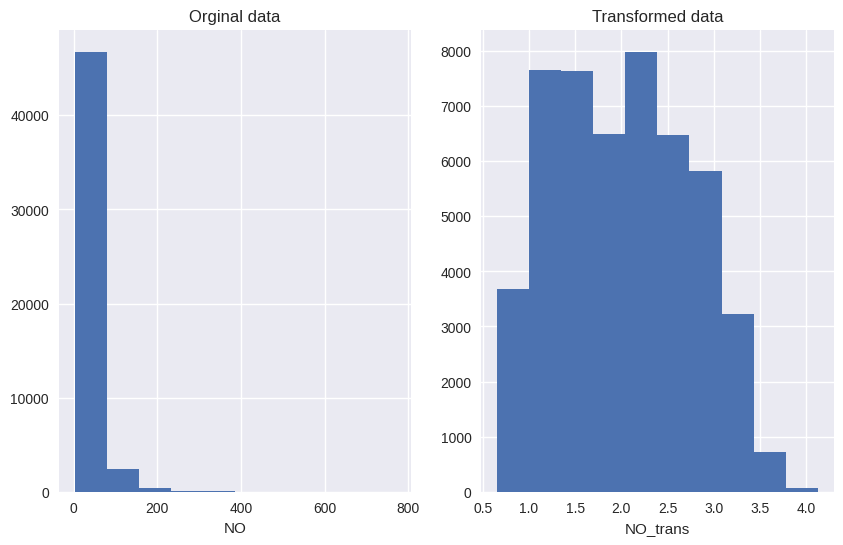

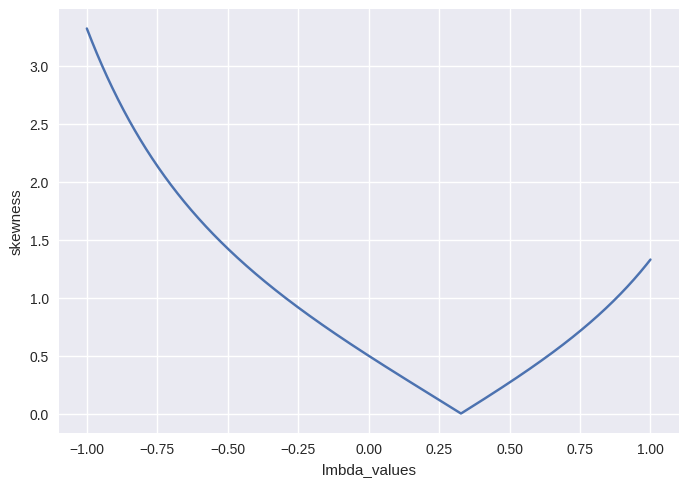

Optimal value of lmbda est:0.3273273273273274


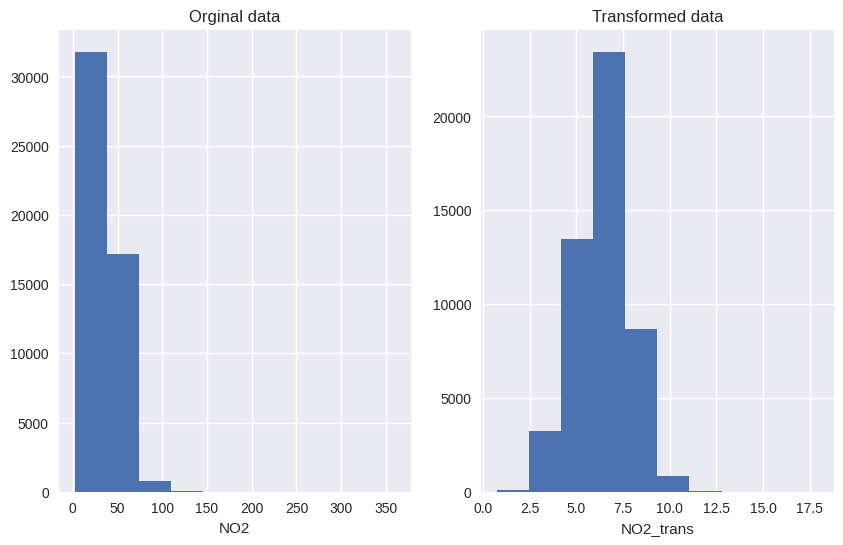

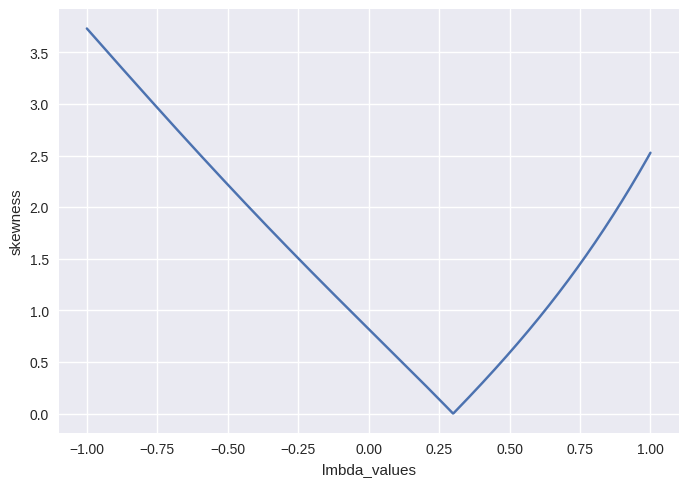

Optimal value of lmbda est:0.2992992992992993


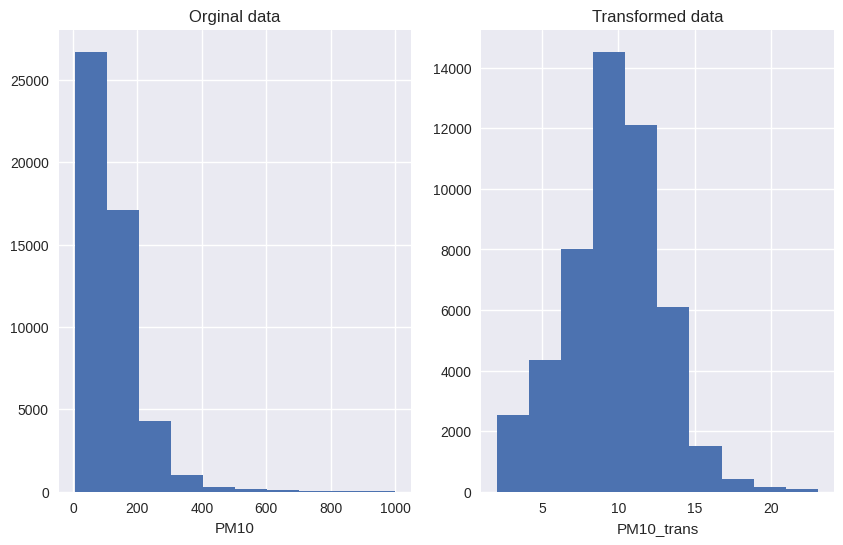

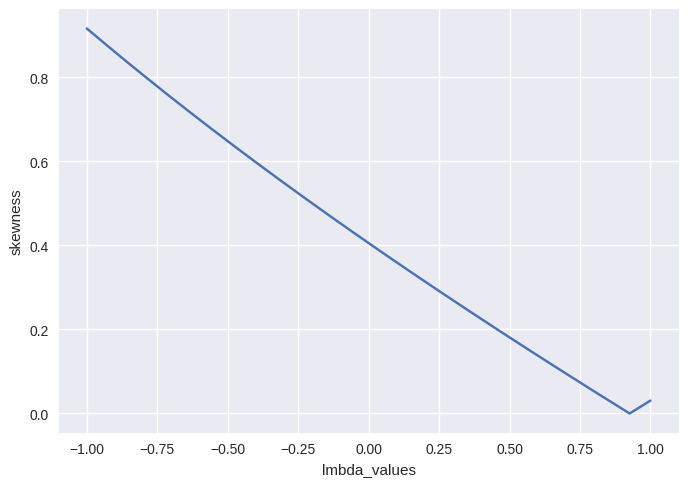

Optimal value of lmbda est:0.9259259259259258


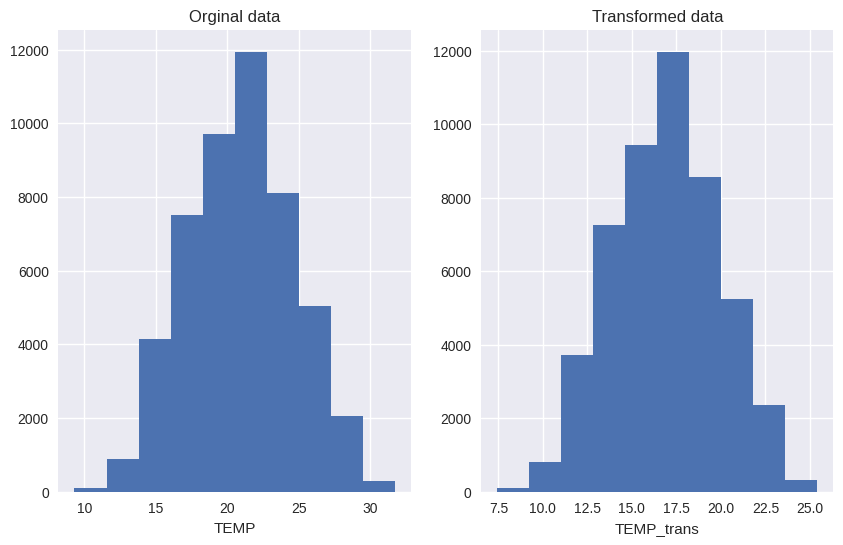

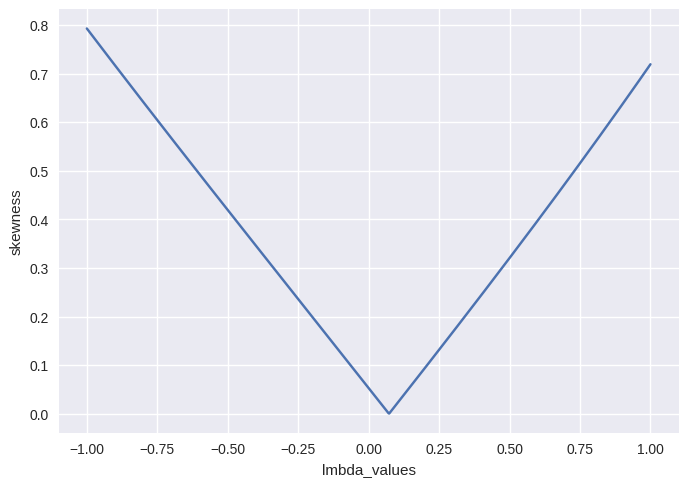

Optimal value of lmbda est:0.07307307307307309


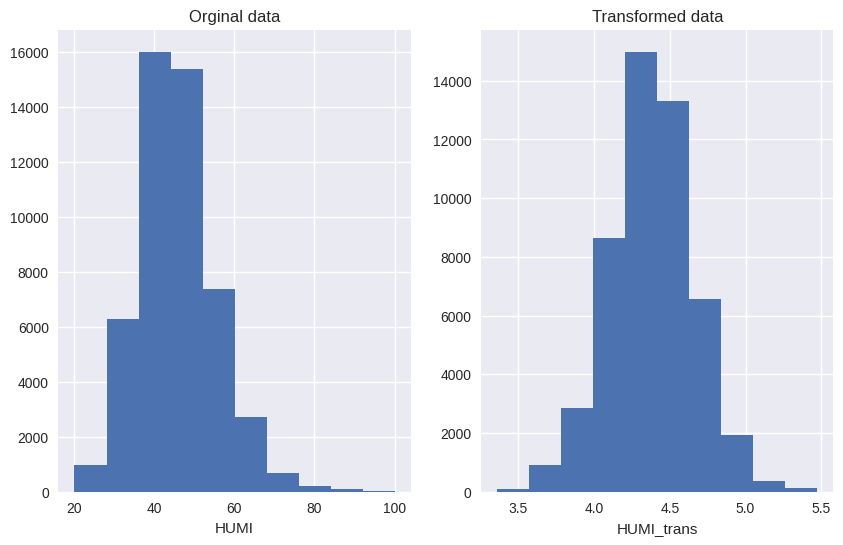

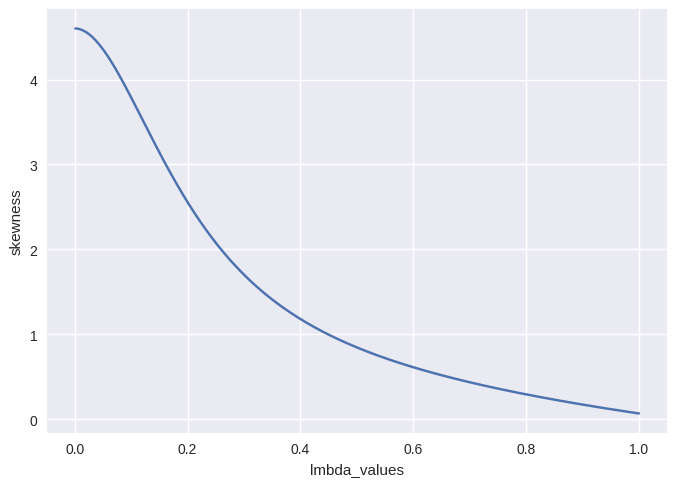

Optimal value of lmbda est:-1.0


ValueError: supplied range of [-inf, 0.9565217391304348] is not finite

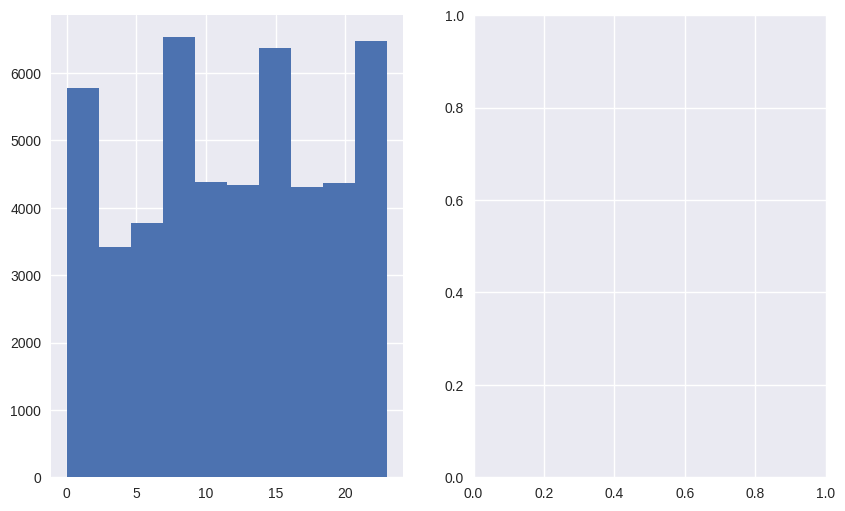

In [28]:
transform_data(chatelet_air,original_cols)

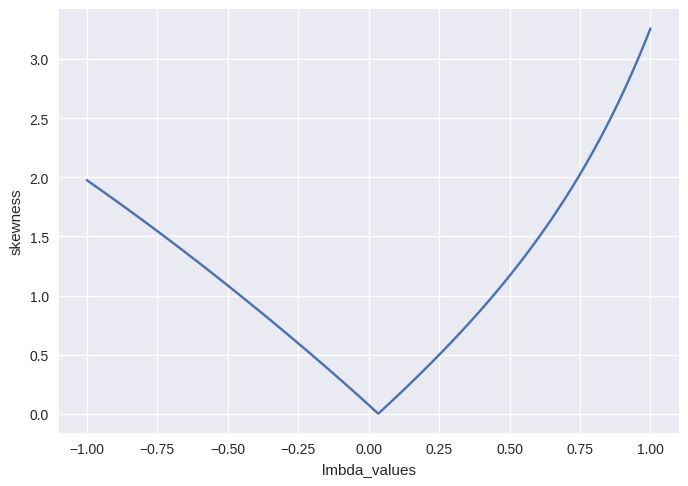

Optimal value of lmbda est:0.03503503503503502


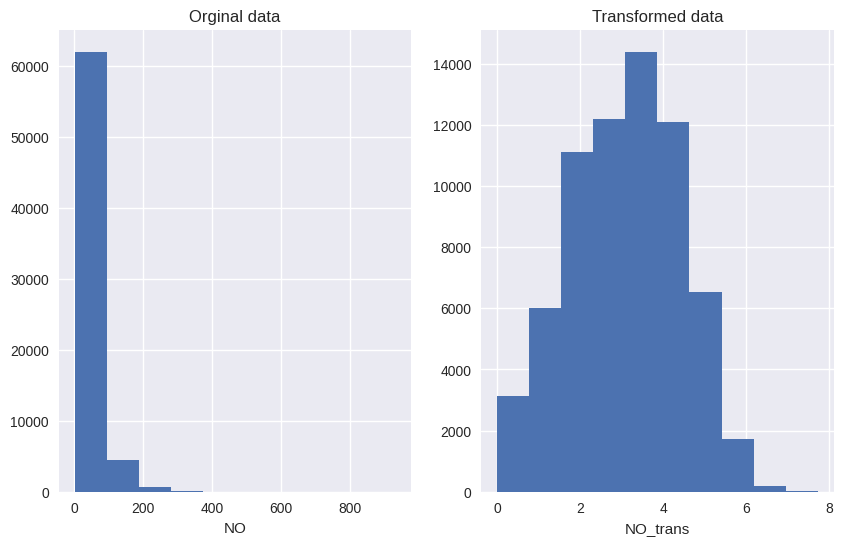

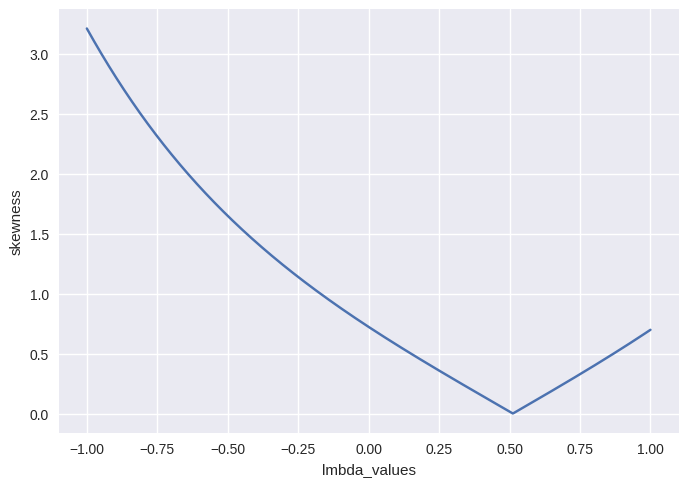

Optimal value of lmbda est:0.5115115115115114


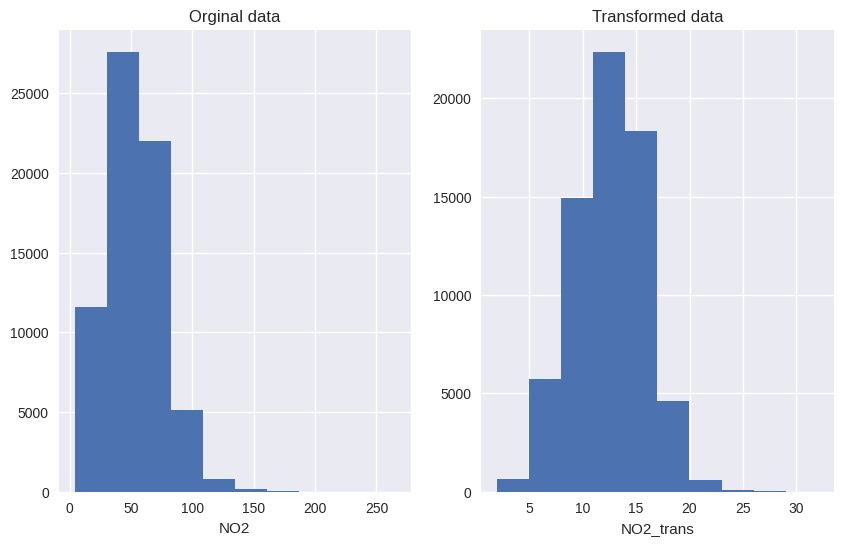

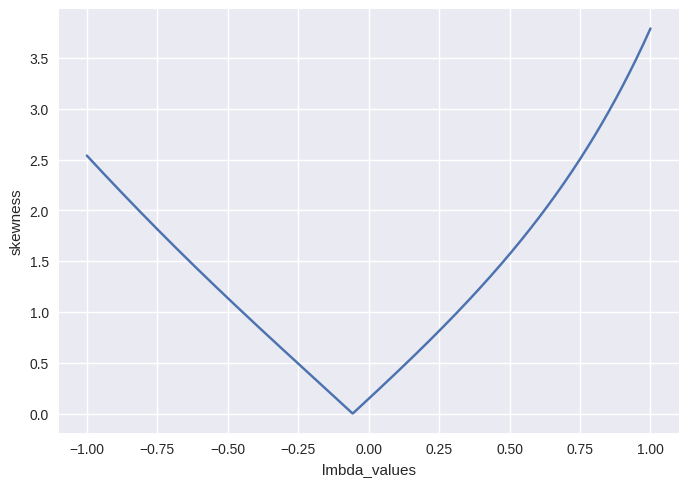

Optimal value of lmbda est:-0.0570570570570571


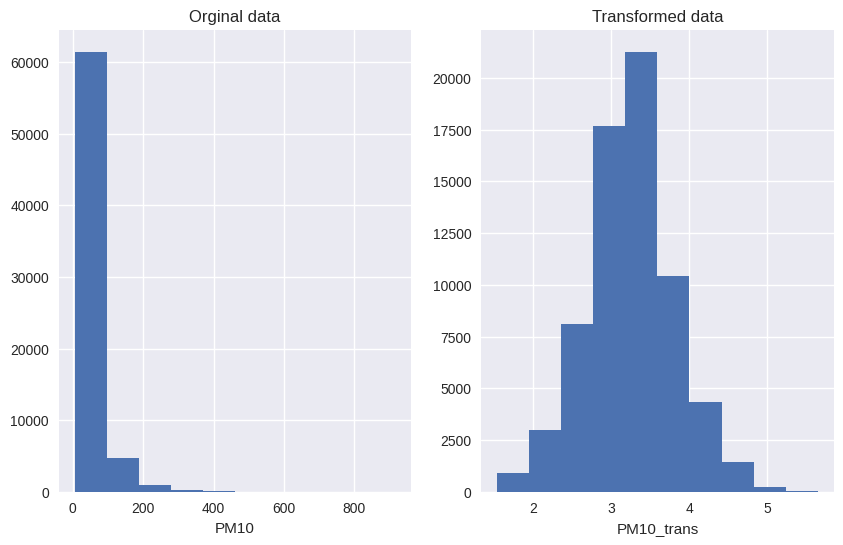

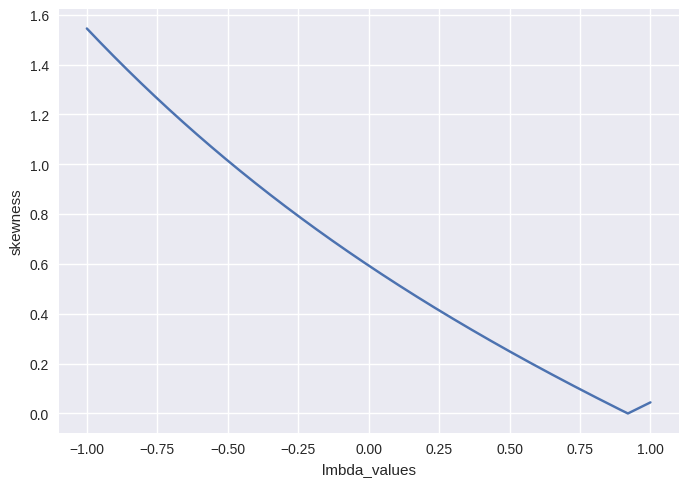

Optimal value of lmbda est:0.91991991991992


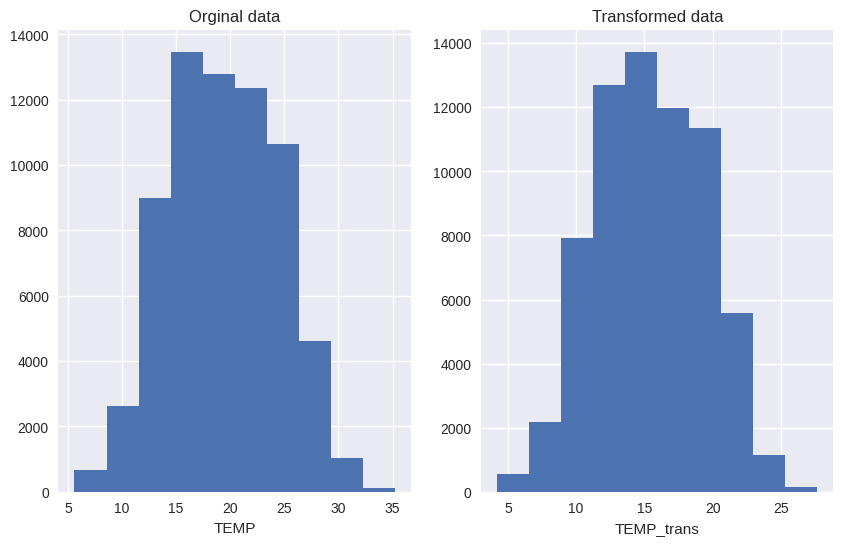

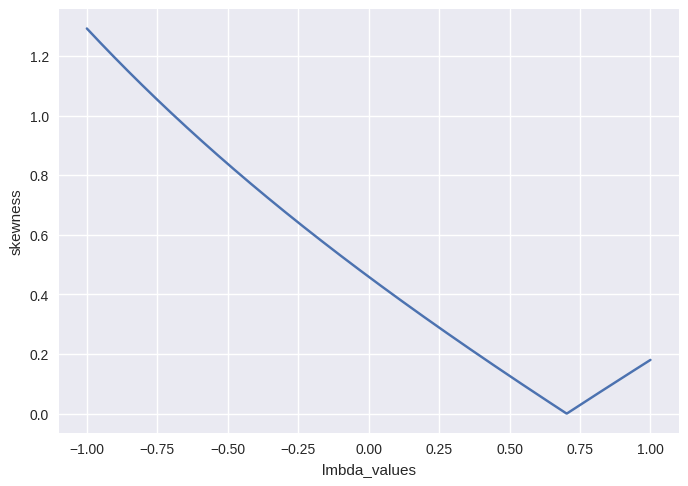

Optimal value of lmbda est:0.7037037037037037


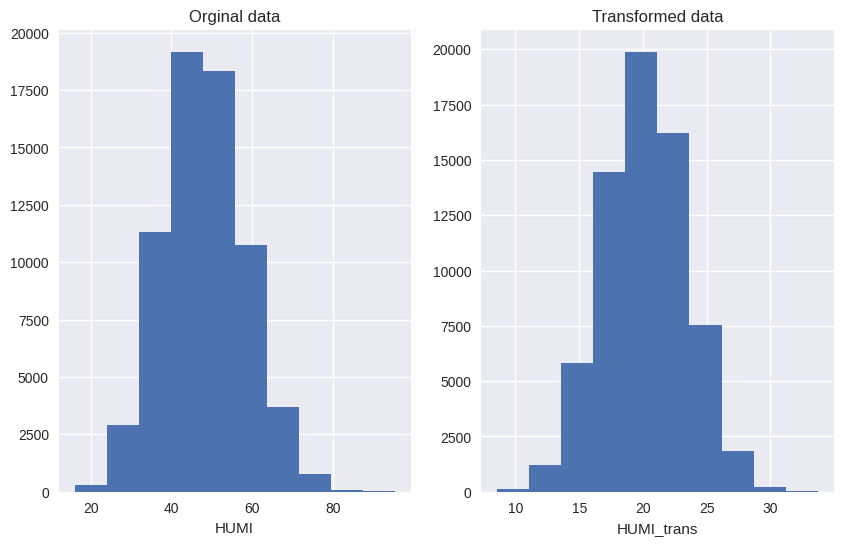

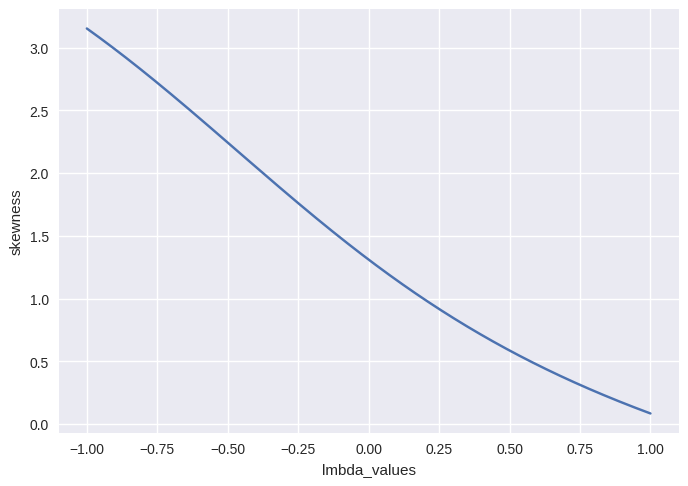

Optimal value of lmbda est:1.0


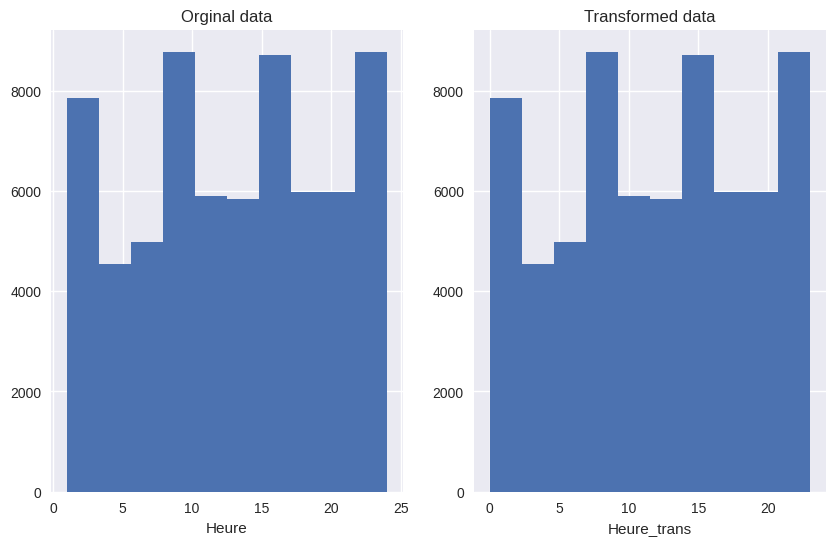

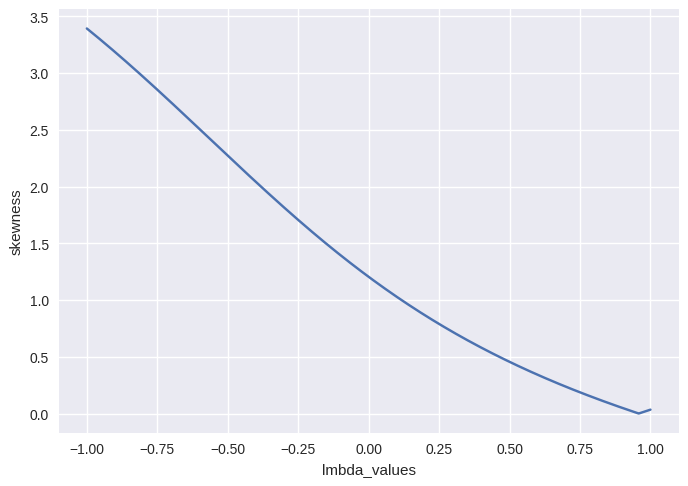

Optimal value of lmbda est:0.957957957957958


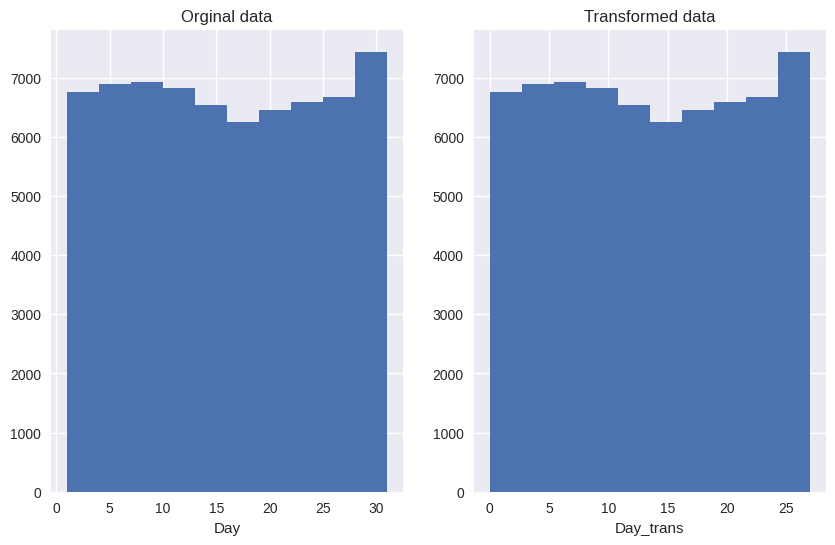

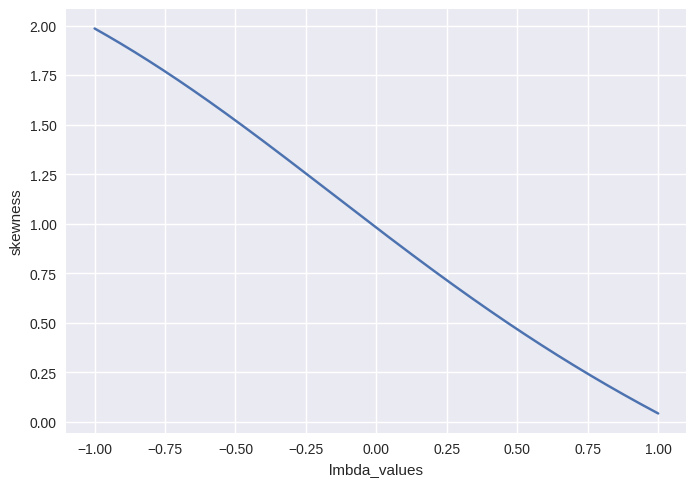

Optimal value of lmbda est:1.0


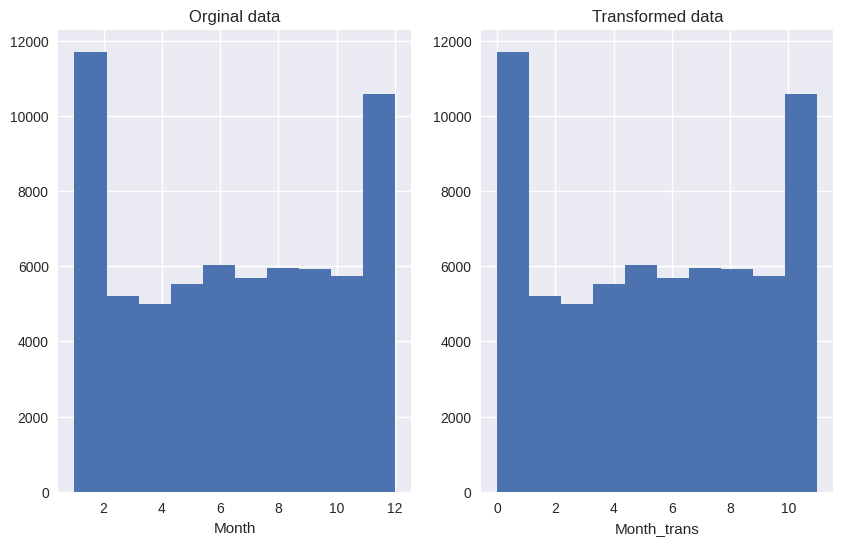

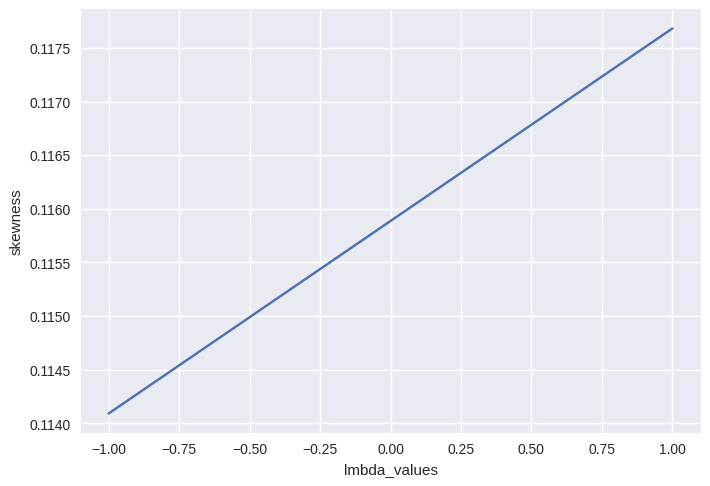

Optimal value of lmbda est:-1.0


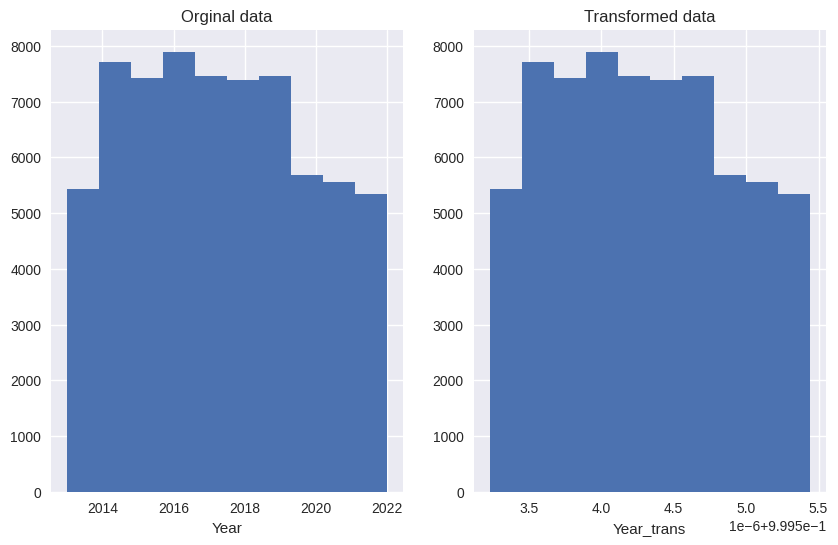

In [ ]:
transform_data(roosevelt_air,original_cols)

['NO',
 'NO2',
 'PM10',
 'TEMP',
 'HUMI',
 'Heure',
 'Day',
 'Month',
 'Year',
 'PM2.5',
 'PM2.5']

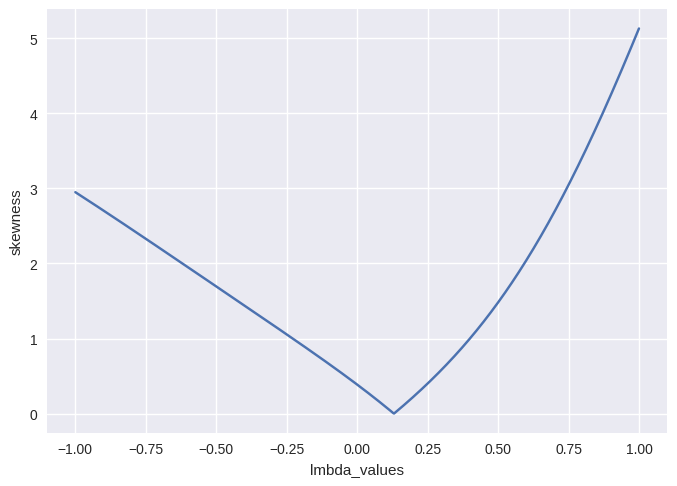

Optimal value of lmbda est:0.13113113113113117


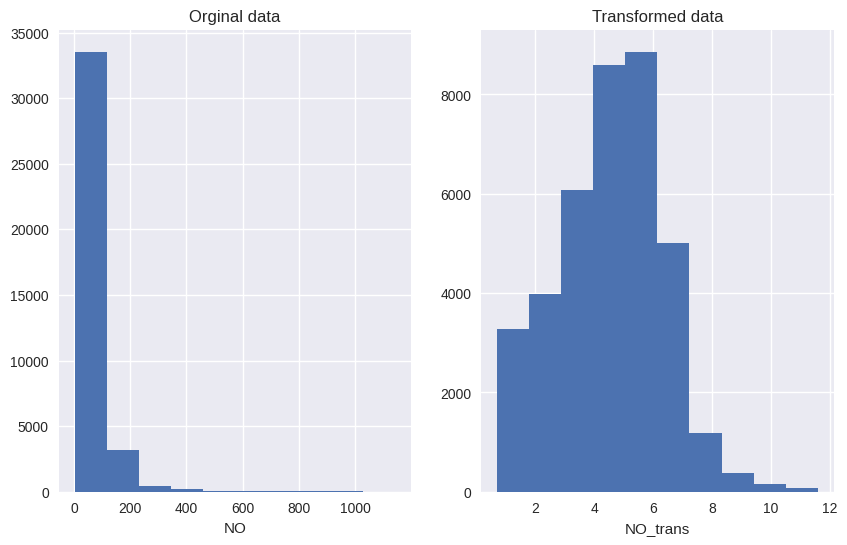

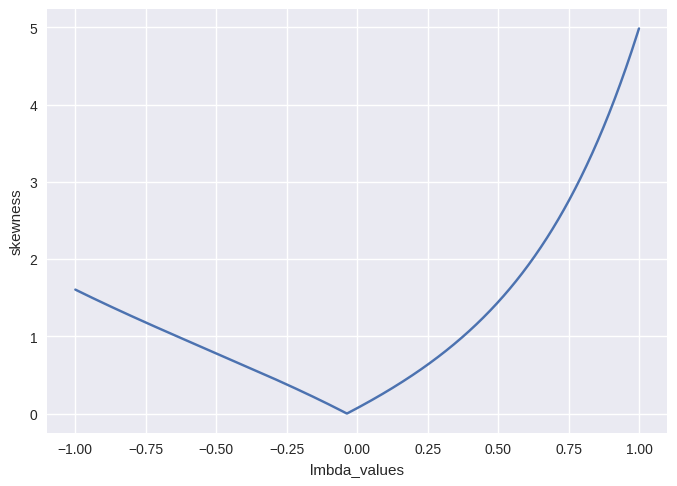

Optimal value of lmbda est:-0.03703703703703709


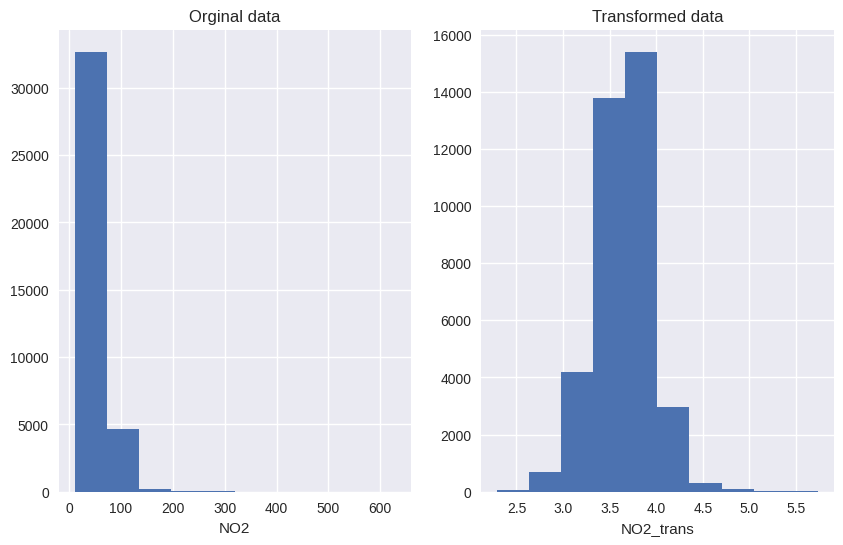

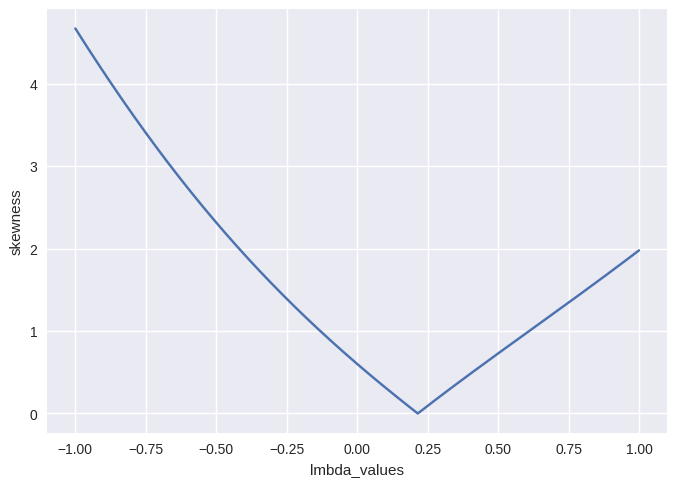

Optimal value of lmbda est:0.21521521521521514


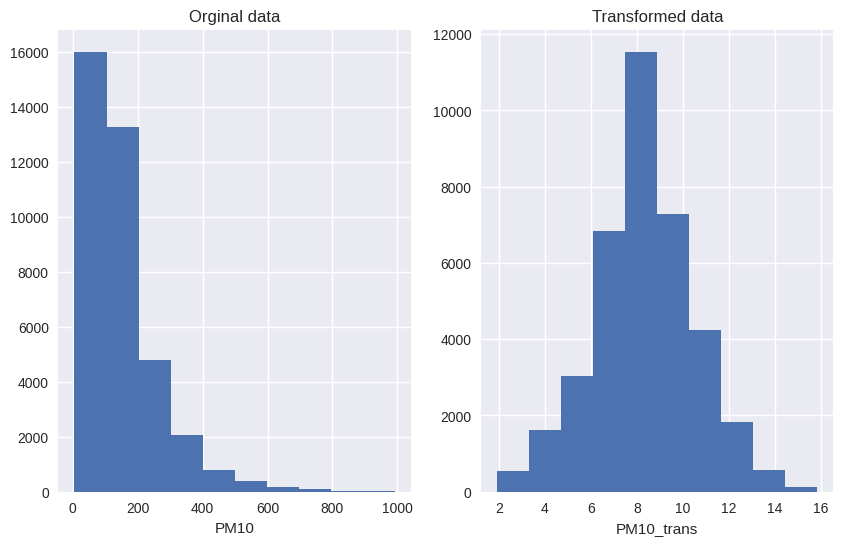

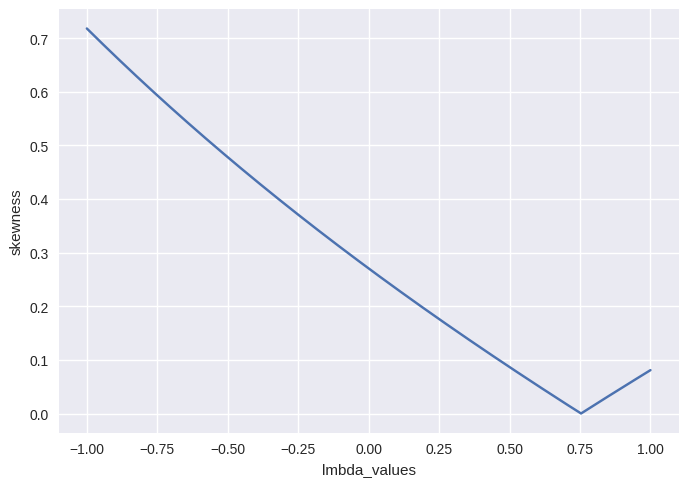

Optimal value of lmbda est:0.7537537537537538


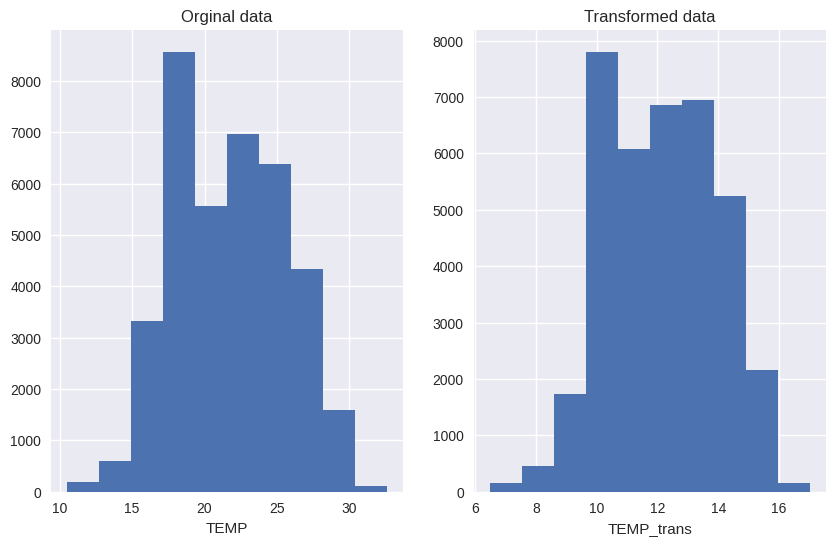

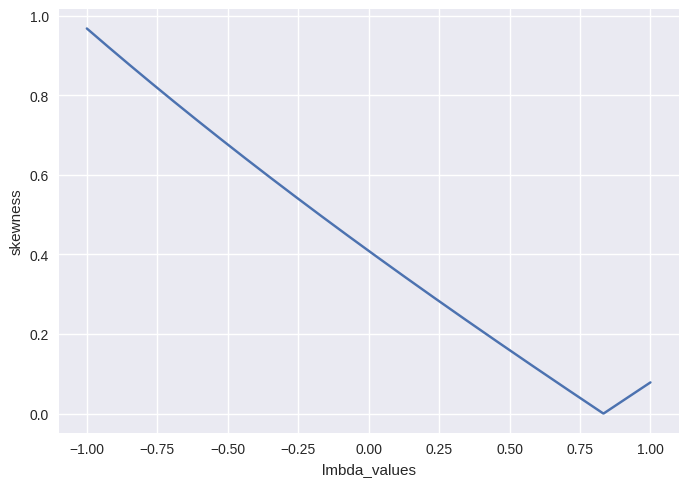

Optimal value of lmbda est:0.8338338338338338


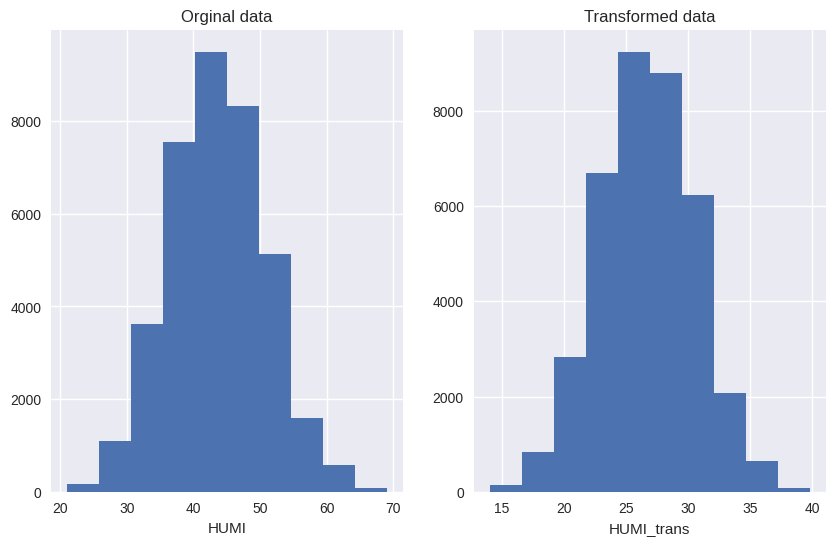

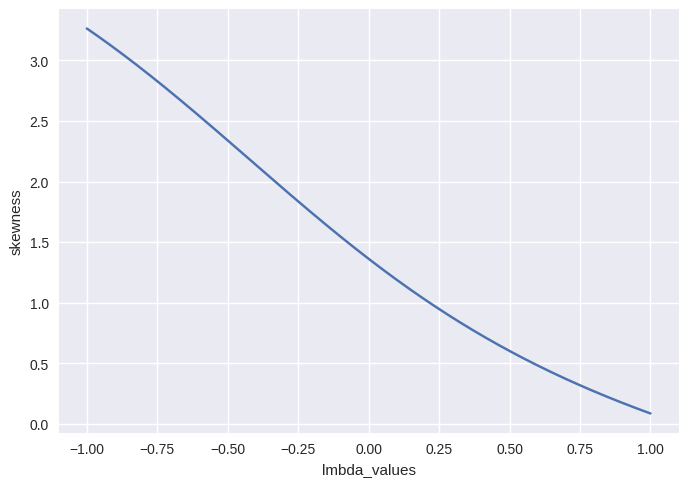

Optimal value of lmbda est:1.0


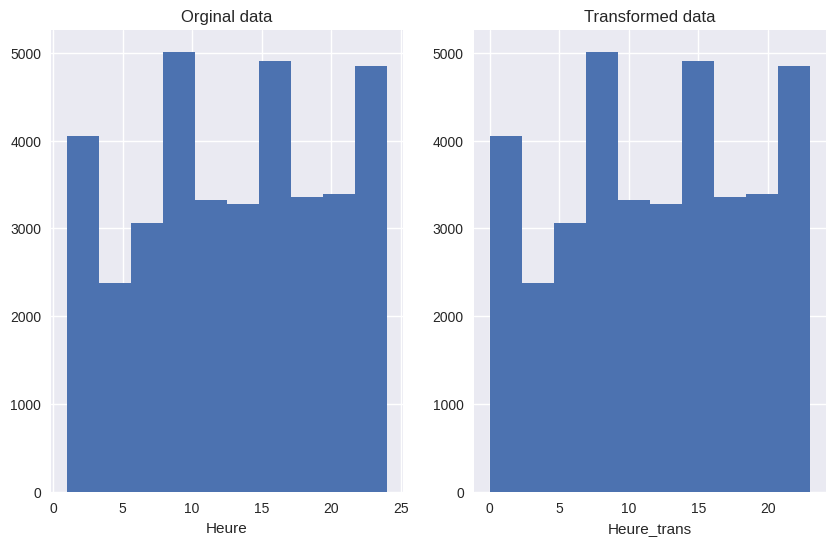

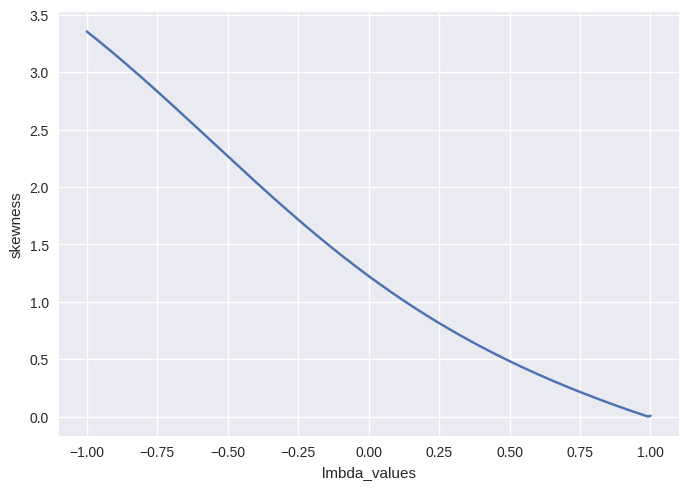

Optimal value of lmbda est:0.98998998998999


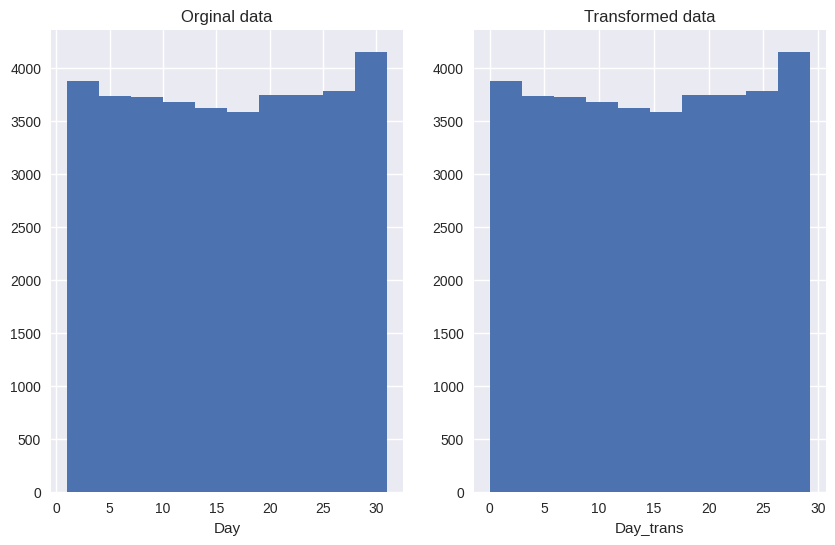

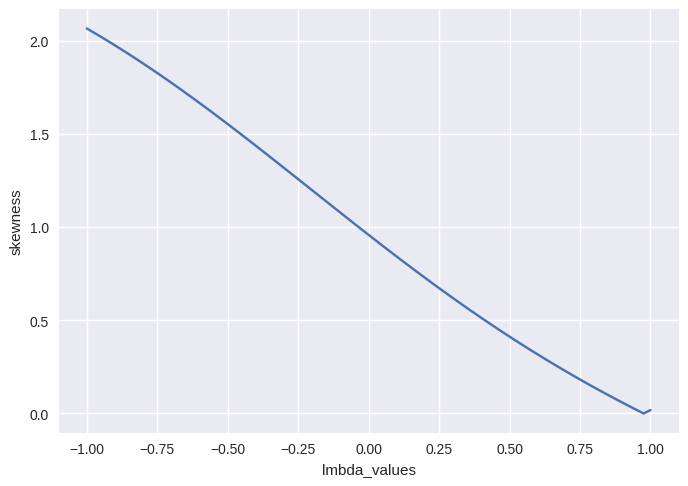

Optimal value of lmbda est:0.9759759759759759


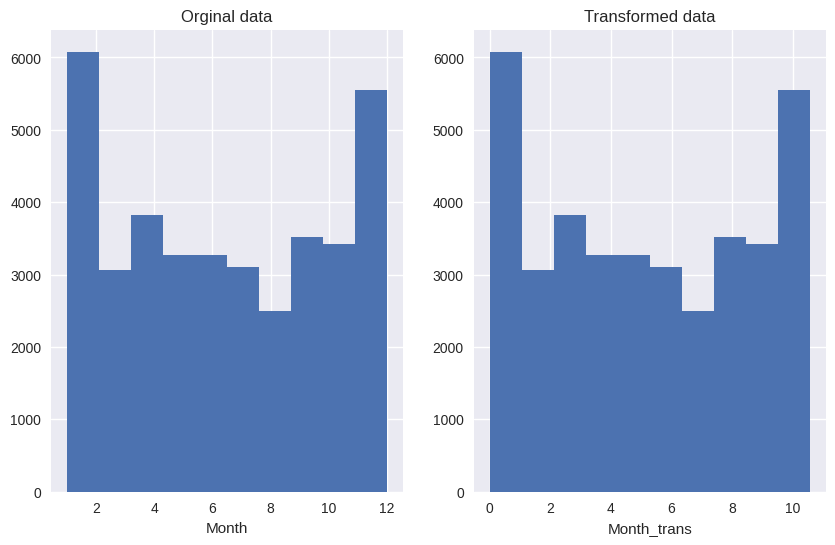

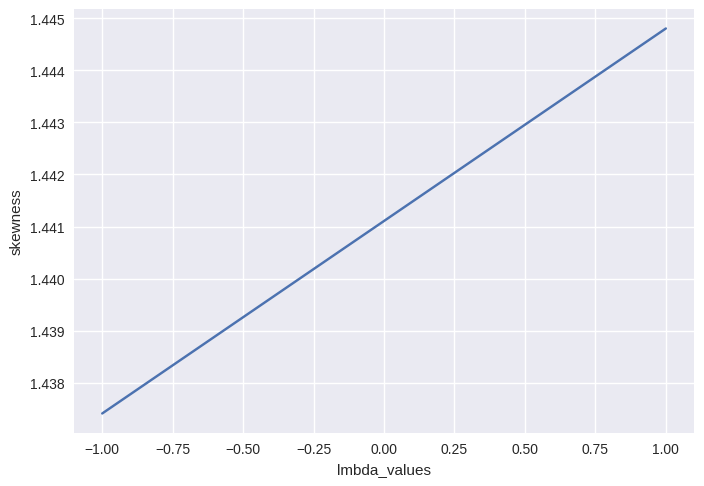

Optimal value of lmbda est:-1.0


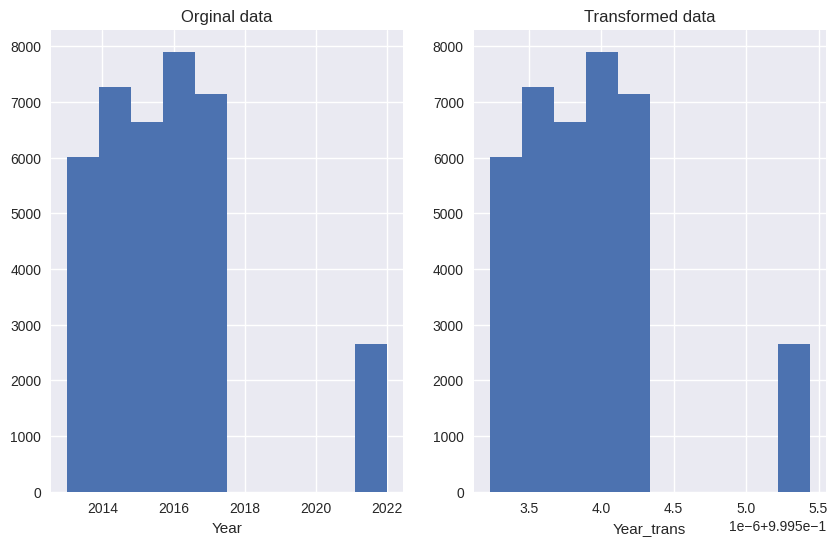

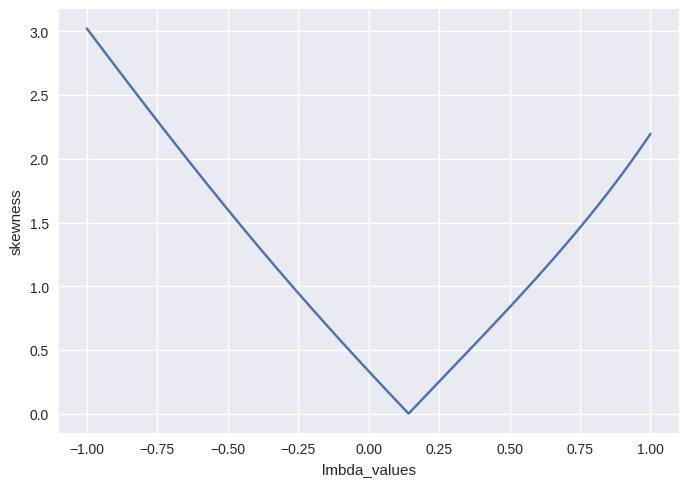

Optimal value of lmbda est:0.14114114114114118


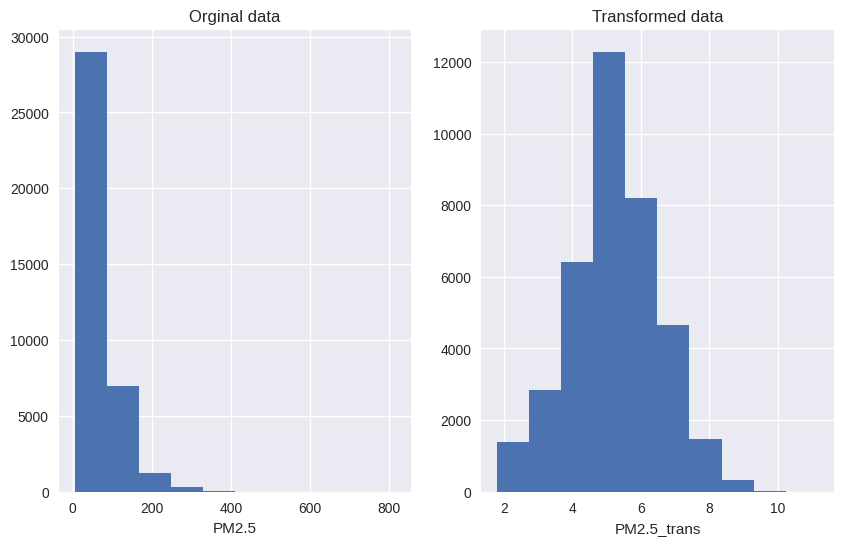

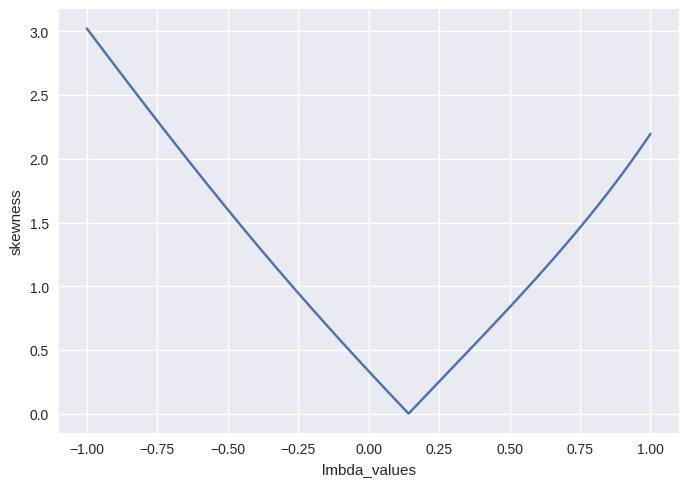

Optimal value of lmbda est:0.14114114114114118


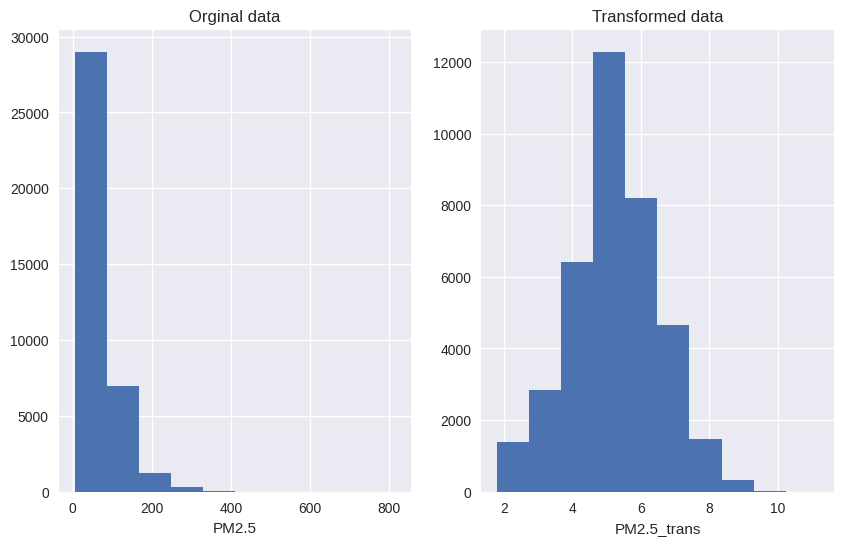

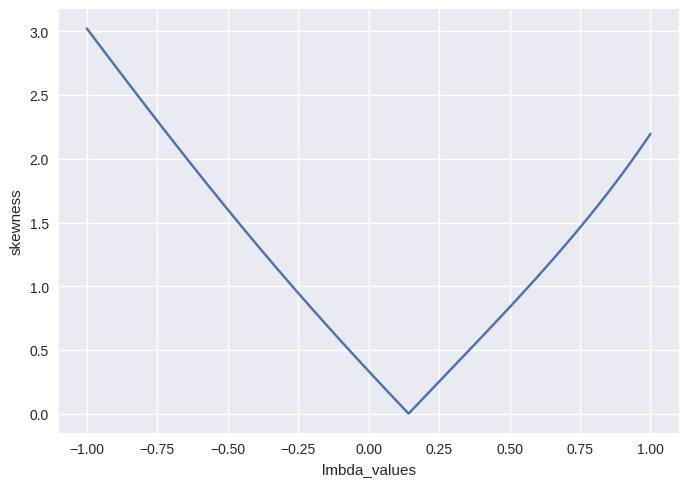

Optimal value of lmbda est:0.14114114114114118


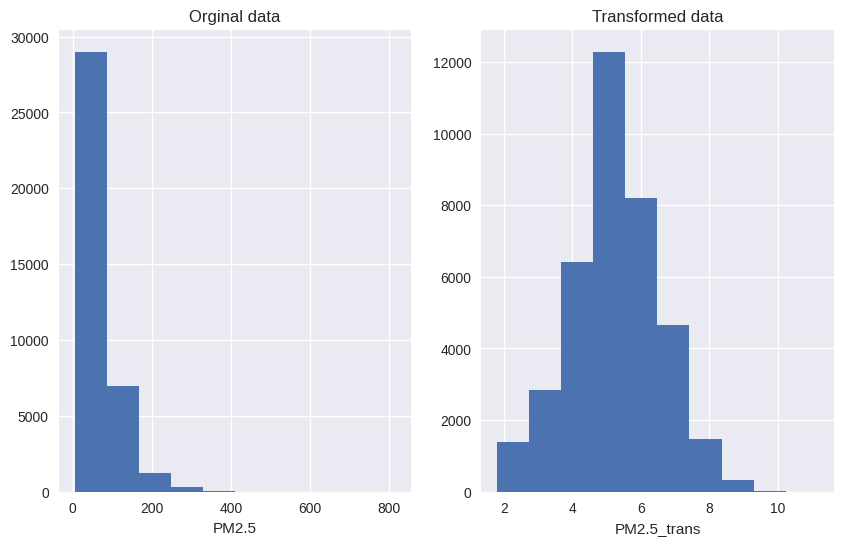

In [ ]:
original_cols_auber=original_cols

original_cols_auber.append("PM2.5")

transform_data(auber_air,original_cols_auber)

### Modelisation

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

In [ ]:
### Data Normalisation
from sklearn.preprocessing import StandardScaler,RobustScaler

def normalize_num_cols(df,scaler):

    df_standard=df.copy()

    standardizing=scaler()
    
    numerical_cols=df.columns[df.nunique()>2]

    standar_col_num=standardizing.fit_transform(df[numerical_cols])

    df_standard[numerical_cols]=standar_col_num

    return df_standard

In [ ]:
Regressors=[LinearRegression,RandomForestRegressor,KNeighborsRegressor,PLSRegression,DecisionTreeRegressor]



def get_metrics(Regressors,train_set,train_label,scaler,cv=50):

    col=["Name","mse_mean","r2_mean","mse_std","r2_std"]

    df=pd.DataFrame(columns=col)

    train_set=normalize_num_cols(train_set,scaler)

    for regressor in Regressors:

        Name=regressor.__name__

        model=regressor()
        
        mse_list=cross_val_score(model,train_set,train_label,scoring="neg_mean_squared_error",cv=cv)
        mse=np.mean(mse_list)

        r2_list=cross_val_score(model,train_set,train_label,scoring="r2",cv=cv)
        r2=np.mean(r2_list)

        mse_std=np.std(mse_list)
        r2_std=np.std(r2_list)
       
        df1=pd.DataFrame([[Name,mse,r2,mse_std,r2_std]],columns=col)
        df=df.append(df1)

    return df

In [30]:
def process_splitting(df,column_choice,target):

    X=df[column_choice]

    y=df[target]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

    return X_train,X_test,y_train,y_test

### Comparaison of transformed vs orginals columns

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,original_cols,"CO2")

df_metric_original_cols=get_metrics(Regressors,X_train,y_train,scaler=RobustScaler,cv=30)

In [ ]:
df_metric_original_cols

,Name,mse_mean,r2_mean,mse_std,r2_std
0,LinearRegression,-8519.961987,0.427687,779.004478,0.023392
0,RandomForestRegressor,-1962.534771,0.869149,555.549787,0.026844
0,KNeighborsRegressor,-3291.746374,0.779304,556.089702,0.026639
0,PLSRegression,-8550.704898,0.425679,798.186739,0.024085
0,DecisionTreeRegressor,-4113.966436,0.732588,841.970685,0.037317


X_train,X_test,y_train,y_test=process_splitting(chatelet_air,transformed_cols,"CO2")

df_metric_transformed_cols=get_metrics(Regressors,X_train,y_train,scaler=RobustScaler,cv=30)

In [ ]:
df_metric_transformed_cols

,Name,mse_mean,r2_mean,mse_std,r2_std
0,LinearRegression,-9550.157459,0.348624,650.119386,0.018829
0,RandomForestRegressor,-3984.000990,0.729200,502.692766,0.021627
0,KNeighborsRegressor,-4487.038992,0.694151,490.617085,0.022714
0,PLSRegression,-9575.203299,0.346923,650.804027,0.018482
0,DecisionTreeRegressor,-8052.299928,0.451638,885.269068,0.057201


### Final model and also model validation

After testing the score of model on X_test, y_test with transformed cols and originals cols with notice that the model performs well on the transformed to follow normal distribution. Afterward, the standization look to not affect the data when we choose transformed columns.

- Challenge have to transform the target from transformed to originals after prediction.

In [ ]:
### Before optimization

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,transformed_cols,"CO2_trans")

RFR=RandomForestRegressor()

RFR.fit(X_train,y_train)

RFR.score(X_test,y_test)

0.896864391117519

In [ ]:
X_train.head()

,NO_trans,NO2_trans,PM10_trans,TEMP_trans,HUMI_trans,Year,Day,Month,Heure
52427,2.690061,5.347857,12.700095,18.770182,4.224061,2016,7,10,11
62521,1.858005,5.590623,10.374747,23.248030,4.658219,2015,13,8,21
15194,1.561592,6.727083,9.014148,10.860962,4.362143,2021,7,1,21
59286,2.785236,6.634706,12.623459,18.611684,4.362143,2015,26,12,16
78982,1.773838,7.487966,9.917317,20.270986,4.554867,2013,26,9,23


### Gridsearch

from datetime import datetime
from sklearn.model_selection import GridSearchCV

## Define Grid 
grid = { 
    'n_estimators': [500,700,800,1000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [10,15,20,25],
    'random_state' : [0,5,10]
}

## show start time
print(datetime.now())## Grid Search function

CV_rfr= GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 30)
CV_rfr.fit(X_train.iloc[:2000,:], y_train[:2000])## show end time

print(datetime.now())

print(f"The best parameters are:{CV_rfr.best_params_} with the score: {CV_rfr.best_score_}")

Best parameters:\
'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 700, 'random_state': 5

'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500

plt.bar(X_train.columns,RF.feature_importances_*100)
plt.xticks(rotation=65)
plt.show()

In [31]:
### Before optimization

X_train,X_test,y_train,y_test=process_splitting(chatelet_air,transformed_cols,"CO2_trans")

RFR=RandomForestRegressor(max_depth=25,
                          max_features='sqrt',
                          n_estimators=1000,
                          random_state=5
                          )

RFR.fit(X_train,y_train)

RFR.score(X_test,y_test)

KeyError: 'CO2_trans'

#### One dataframe for all station to check correlation between indicators in the same time

roosevelt_air=roosevelt_air.add_suffix(suffix="_roos")
chatelet_air=chatelet_air.add_suffix(suffix="_chate")
auber_air=auber_air.add_suffix(suffix="_aub")

roosevelt_air.shape,chatelet_air.shape,auber_air.shape